In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('NASA.csv',skiprows=11)

# Display the first few rows of the data
print(data.head())


   YEAR  MO  DY  HR    T2M  WS50M  ALLSKY_SFC_SW_DWN
0  2022   1   1   0  14.92   3.58                0.0
1  2022   1   1   1  14.87   3.34                0.0
2  2022   1   1   2  14.80   3.23                0.0
3  2022   1   1   3  14.81   3.23                0.0
4  2022   1   1   4  14.77   3.39                0.0


In [3]:
# Display summary statistics
print(data.describe())

              YEAR           MO           DY           HR          T2M  \
count  8784.000000  8784.000000  8784.000000  8784.000000  8784.000000   
mean   2022.002732     6.510929    15.680328    11.500000    21.554039   
std       0.052202     3.455396     8.818268     6.922581     6.091092   
min    2022.000000     1.000000     1.000000     0.000000     9.870000   
25%    2022.000000     4.000000     8.000000     5.750000    16.190000   
50%    2022.000000     7.000000    16.000000    11.500000    21.490000   
75%    2022.000000    10.000000    23.000000    17.250000    26.880000   
max    2023.000000    12.000000    31.000000    23.000000    39.900000   

             WS50M  ALLSKY_SFC_SW_DWN  
count  8784.000000        8784.000000  
mean      5.874481         235.847288  
std       3.100331         312.701681  
min       0.060000           0.000000  
25%       3.540000           0.000000  
50%       5.470000          13.715000  
75%       7.860000         466.957500  
max      18.4

In [4]:
# Rename the columns to lowercase for compatibility with to_datetime
data.rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day', 'HR': 'hour'}, inplace=True)

# Combine year, month, day, and hour into a datetime column
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Set datetime as the index
data.set_index('datetime', inplace=True)

# Drop the original date columns as they are now redundant
data.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

# Display the first few rows to confirm the changes
print(data.head())


                       T2M  WS50M  ALLSKY_SFC_SW_DWN
datetime                                            
2022-01-01 00:00:00  14.92   3.58                0.0
2022-01-01 01:00:00  14.87   3.34                0.0
2022-01-01 02:00:00  14.80   3.23                0.0
2022-01-01 03:00:00  14.81   3.23                0.0
2022-01-01 04:00:00  14.77   3.39                0.0


In [5]:
# Display data types
print(data.dtypes)

# Display summary statistics
print(data.describe())


T2M                  float64
WS50M                float64
ALLSKY_SFC_SW_DWN    float64
dtype: object
               T2M        WS50M  ALLSKY_SFC_SW_DWN
count  8784.000000  8784.000000        8784.000000
mean     21.554039     5.874481         235.847288
std       6.091092     3.100331         312.701681
min       9.870000     0.060000           0.000000
25%      16.190000     3.540000           0.000000
50%      21.490000     5.470000          13.715000
75%      26.880000     7.860000         466.957500
max      39.900000    18.490000        1041.420000


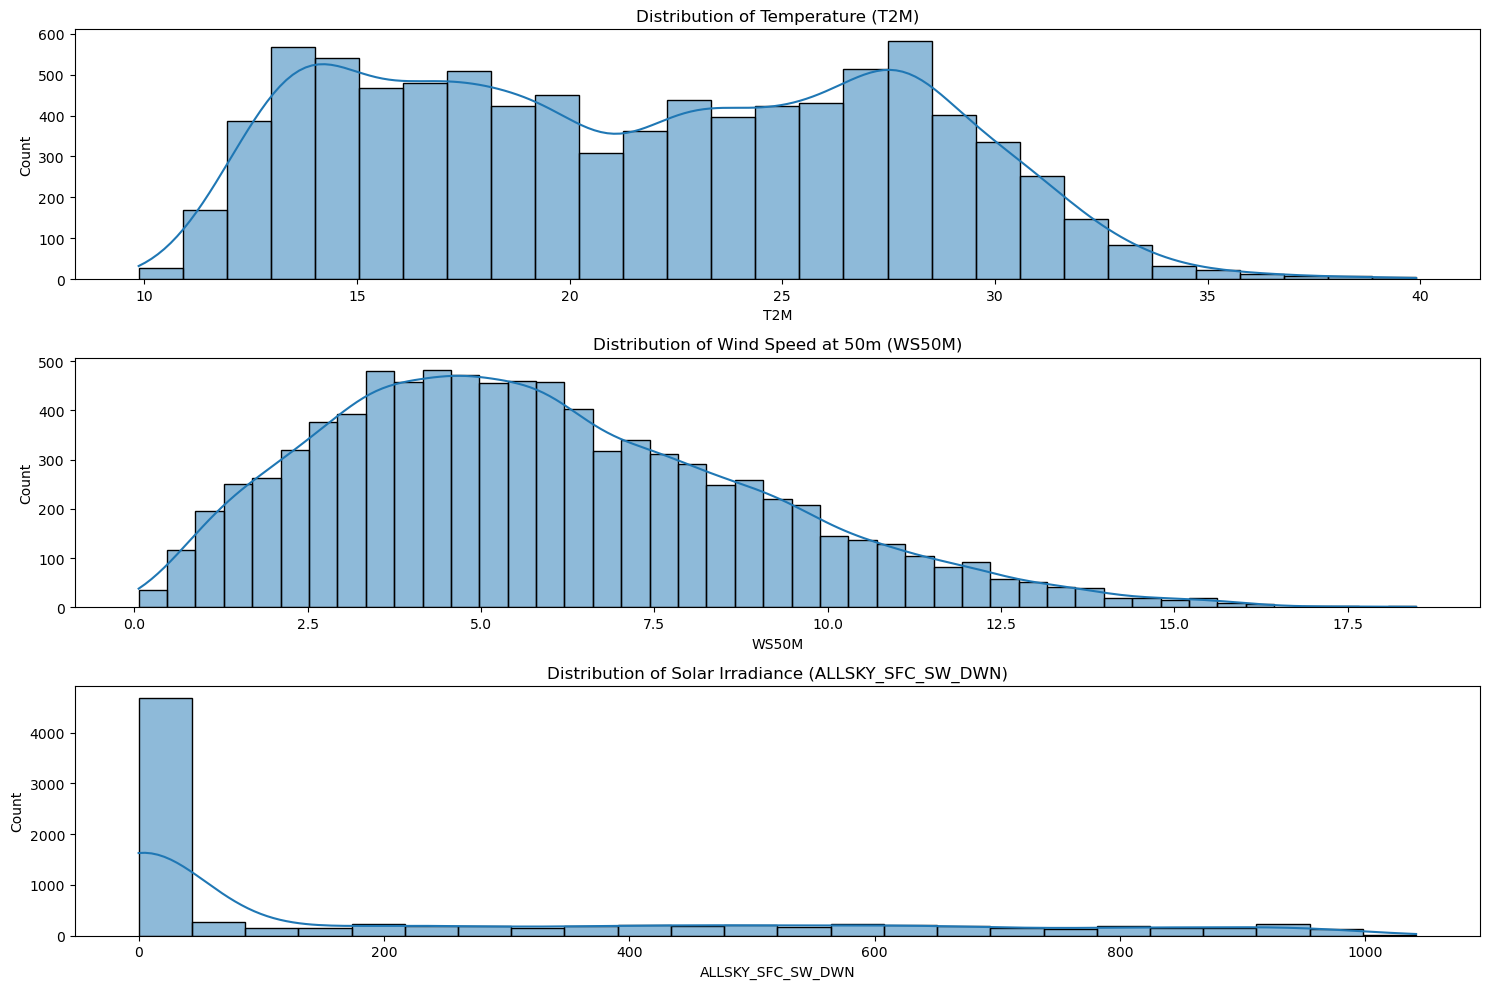

In [6]:

# Plot the distribution of each variable
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.histplot(data['T2M'], kde=True)
plt.title('Distribution of Temperature (T2M)')

plt.subplot(3, 1, 2)
sns.histplot(data['WS50M'], kde=True)
plt.title('Distribution of Wind Speed at 50m (WS50M)')

plt.subplot(3, 1, 3)
sns.histplot(data['ALLSKY_SFC_SW_DWN'], kde=True)
plt.title('Distribution of Solar Irradiance (ALLSKY_SFC_SW_DWN)')

plt.tight_layout()
plt.show()


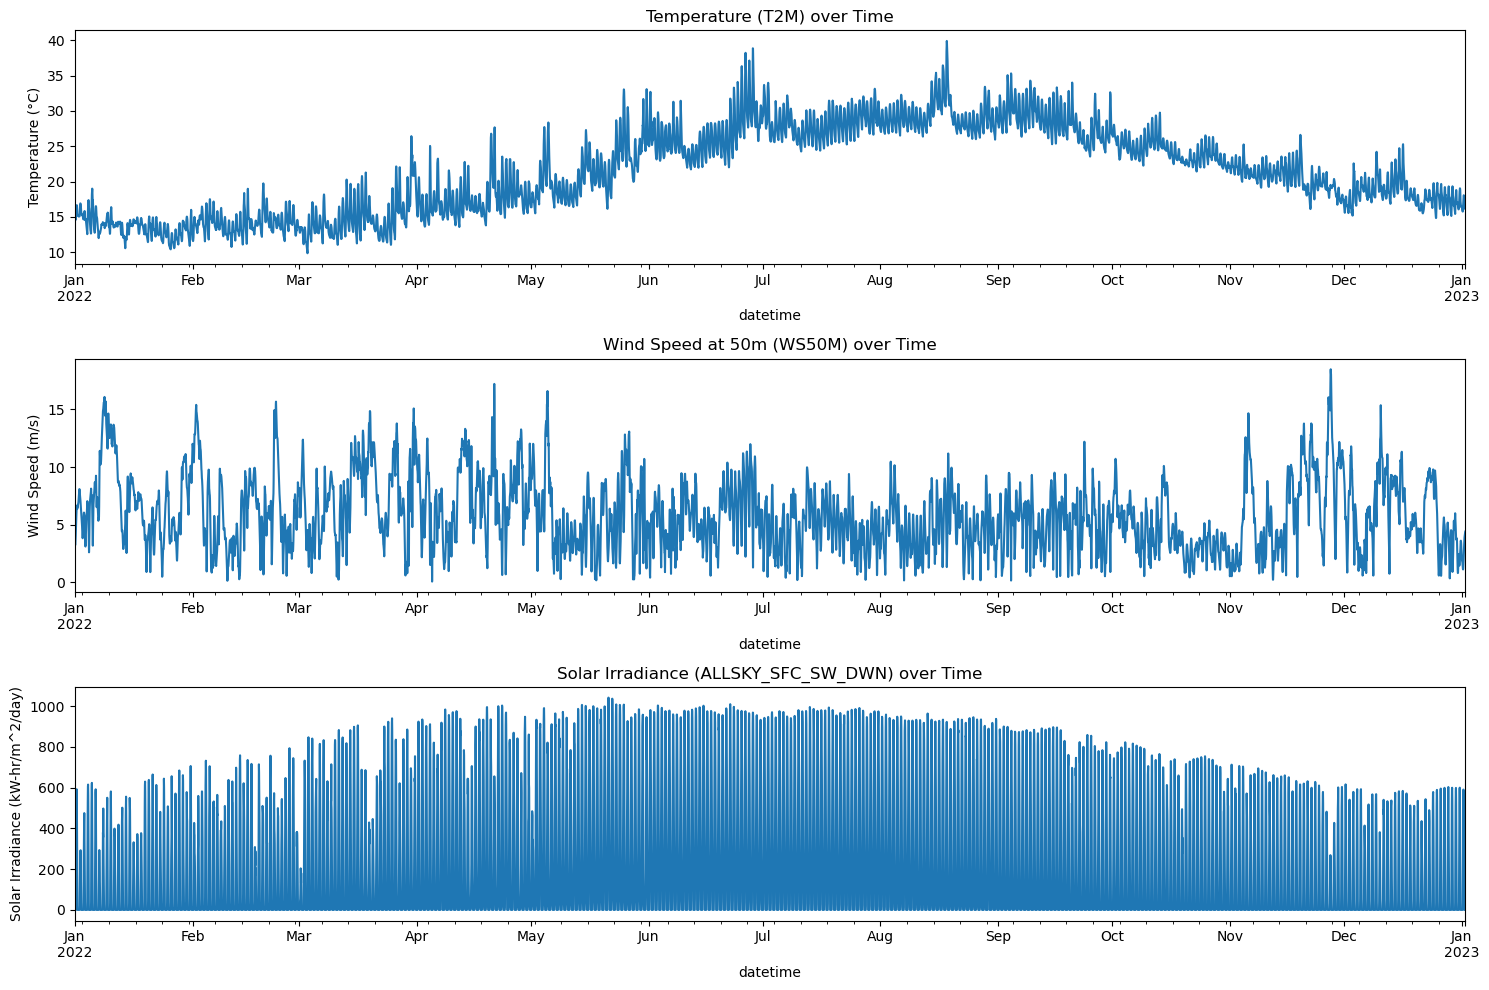

In [7]:
# Plot time series of each variable
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
data['T2M'].plot()
plt.title('Temperature (T2M) over Time')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 1, 2)
data['WS50M'].plot()
plt.title('Wind Speed at 50m (WS50M) over Time')
plt.ylabel('Wind Speed (m/s)')

plt.subplot(3, 1, 3)
data['ALLSKY_SFC_SW_DWN'].plot()
plt.title('Solar Irradiance (ALLSKY_SFC_SW_DWN) over Time')
plt.ylabel('Solar Irradiance (kW-hr/m^2/day)')

plt.tight_layout()
plt.show()


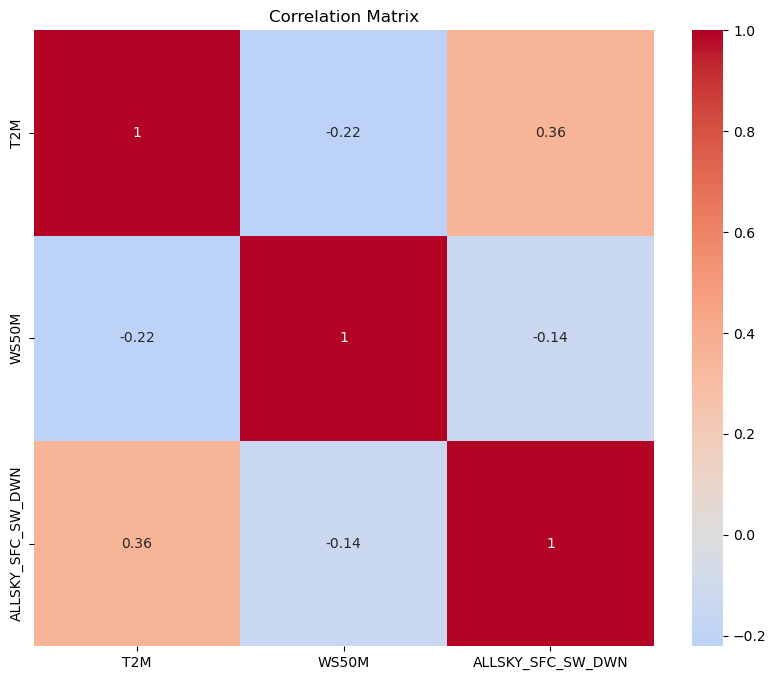

In [8]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


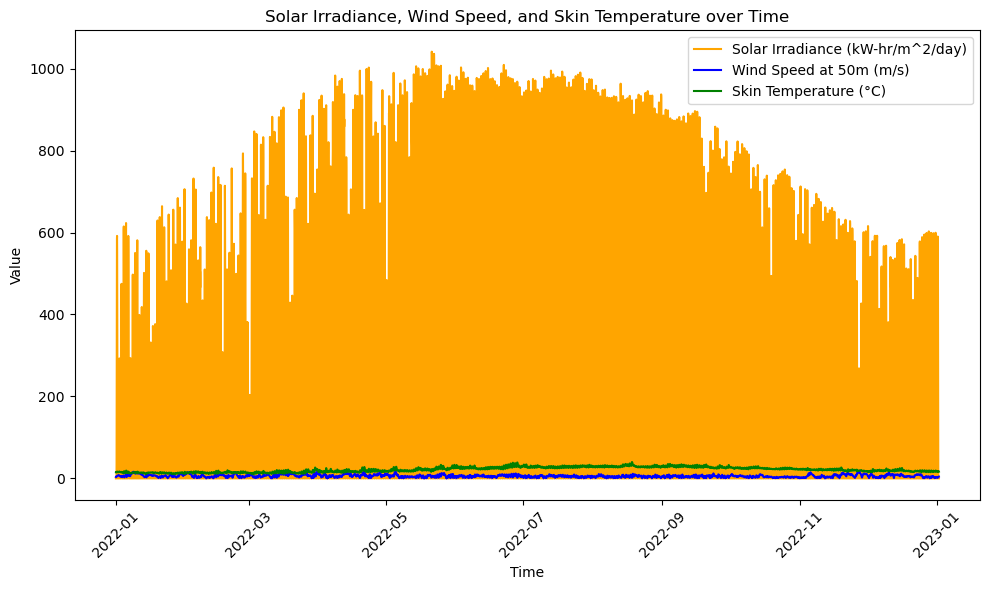

In [9]:


# Create a figure and axis objects
plt.figure(figsize=(10, 6))

# Plot solar irradiance
plt.plot(data.index, data['ALLSKY_SFC_SW_DWN'], color='orange', label='Solar Irradiance (kW-hr/m^2/day)')

# Plot wind speed
plt.plot(data.index, data['WS50M'], color='blue', label='Wind Speed at 50m (m/s)')

# Plot skin temperature
plt.plot(data.index, data['T2M'], color='green', label='Skin Temperature (°C)')

# Add legend, title, and labels
plt.legend()
plt.title('Solar Irradiance, Wind Speed, and Skin Temperature over Time')
plt.xlabel('Time')
plt.ylabel('Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()
